In [1]:
import numpy as np
import pandas as pd
from skimage import filters
from skimage.io import imread, imshow

from skimage.morphology import disk
import matplotlib.pyplot as plt
from skimage import feature
%matplotlib inline
from skimage.filters import prewitt_h,prewitt_v
import os, shutil
import cv2
import imutils
from tqdm import tqdm

ModuleNotFoundError: No module named 'imutils'

In [ ]:
img = cv2.imread('D://final code//images//fire.30.png')
if(img is not None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

In [95]:
#The matrix has 921,600 pixels


In [1]:
pre_hor = prewitt_h(img)
pre_ver = prewitt_v(img)





imshow(pre_hor, cmap='gray');

NameError: name 'prewitt_h' is not defined

In [49]:
#pixel features
px = np.reshape(img, (720*1280))
px.shape, px

((921600,), array([15, 16, 17, ..., 13, 12, 10], dtype=uint8))

((394, 700, 3), <matplotlib.image.AxesImage at 0x198a6fd0388>)

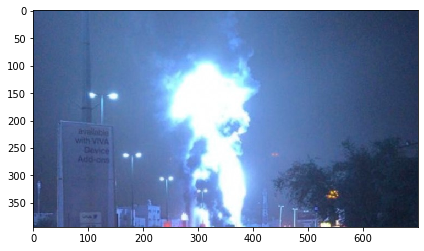

In [35]:
img = cv2.imread('D://final code//images//fire.30.png')
img.shape, imshow(img)

In [ ]:
#Mean pixel value of 3 channels

In [20]:
img = imread('D://downloads//fire.3.png')
f_matrix = np.zeros((720, 1280))
f_matrix.shape

(720, 1280)

In [22]:
#Avg pixel value
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        f_matrix[i][j] = ((int(img[i,j,0]) + int(img[i,j,1]) + int(img[i,j,2]))/3)

In [24]:
#1D array
px = np.reshape(f_matrix, (720*1280))
px.shape

(921600,)

In [19]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

(64, 128, 3)


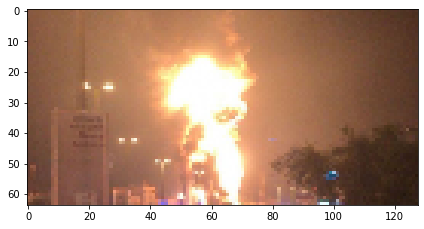

In [24]:
#HOG feature descriptor
img2 = imread('D://final code//images//fire.30.png')
resized_img = cv2.resize(img2, (128,64))
imshow(resized_img)
print(resized_img.shape)

In [25]:
#hog features
from skimage import feature
h, hog_img = feature.hog(resized_img, orientations=9, pixels_per_cell=(8,8),
                   cells_per_block=(2,2), transform_sqrt=True, block_norm="L1", visualize=True)

In [26]:
h.shape

(3780,)

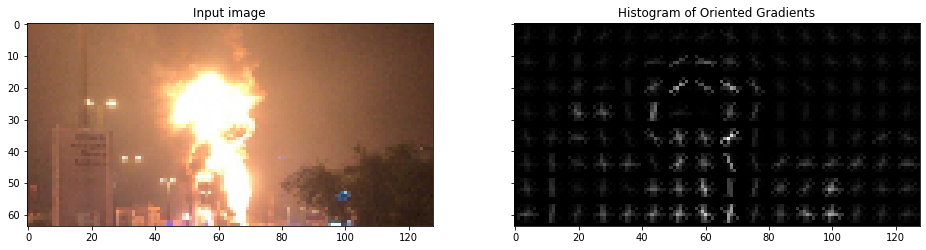

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [5]:
base_path = 'D:\\final code\\'
files = os.listdir(base_path + 'images')

In [7]:
def f_extraction(files):
    img_list = []
    for i in tqdm(files):
        #load image, convert to grayscale
        image = cv2.imread(base_path + 'images\\' + i)
        if(image is not None):
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply dilation and erosion to remove some noise
        kernel = np.ones((1, 1), np.uint8)
        image = cv2.dilate(gray, kernel, iterations=1)
        image = cv2.erode(image, kernel, iterations=1)
        
        #edge detection
        edged = imutils.auto_canny(image)
        
        blur = cv2.GaussianBlur(edged, (5, 5), 0)
        thres = cv2.threshold(blur, 10, 255, cv2.THRESH_BINARY)[1]
        
        
        #find contours 
        cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)
        
        #extract the image and resize it to a canonical width and height
        (x, y, w, h) = cv2.boundingRect(c)
        img = gray[y:y + h, x:x + w]
        img = cv2.resize(img, (128, 64))
        
        #extract histogram of oriented gradients
        H = feature.hog(img, orientations=9, pixels_per_cell=(8,8),
                   cells_per_block=(2,2), transform_sqrt=True, block_norm="L1")
        
        img_list.append(H)
    return img_list

img_list = f_extraction(files=files)   


100%|██████████████████████████████████████████████████████████████████████████████| 1001/1001 [02:01<00:00,  8.23it/s]
